# House Price Predction


**Task**: Build and Deploy a Machine Learning Model for Predicting House Prices
<br><br>
**Dataset**: California Housing Dataset (from Scikit-learn)

## 1. Data Preprocessing

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np

### 1.1 Loading the Dataset and EDA

In [ ]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
california_housing_df = california_housing.frame

In [ ]:
print(f"The dataset contains {california_housing.data.shape[0]} samples and {california_housing.data.shape[1]} features")

The dataset contains 20640 samples and 8 features


In [ ]:
california_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
print(f"Count total NaN in the DataFrame: {california_housing_df.isnull().sum().sum()}")

Count total NaN in the DataFrame: 0


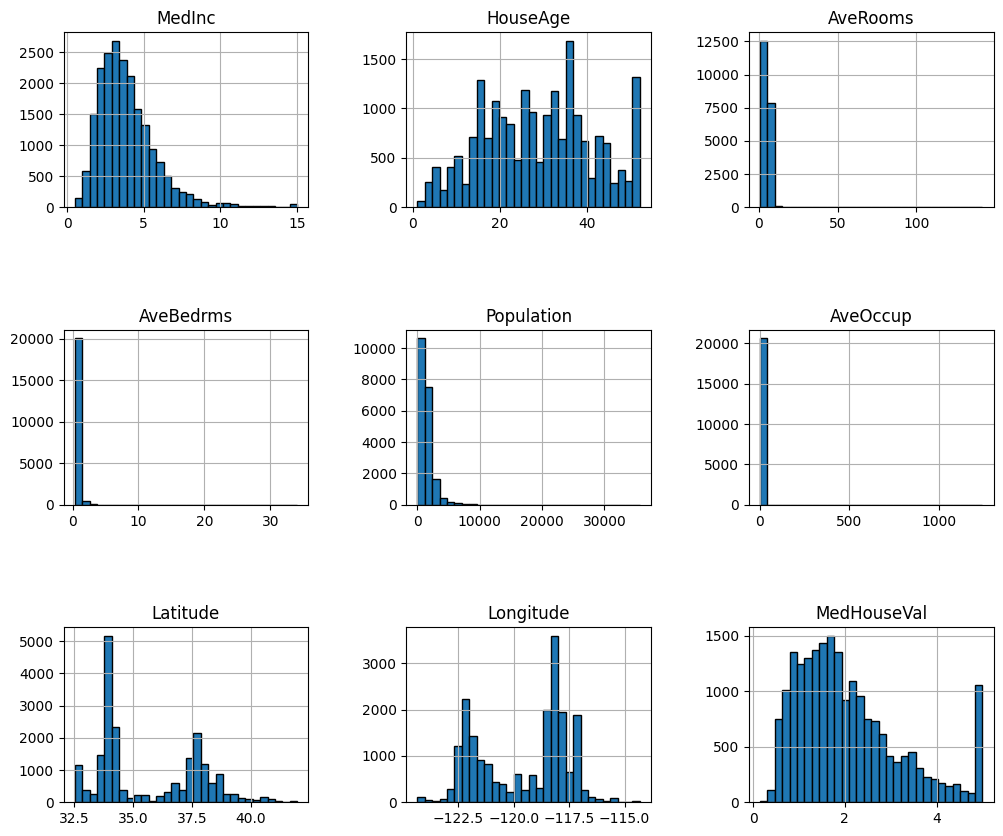

In [ ]:
california_housing_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing_df[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


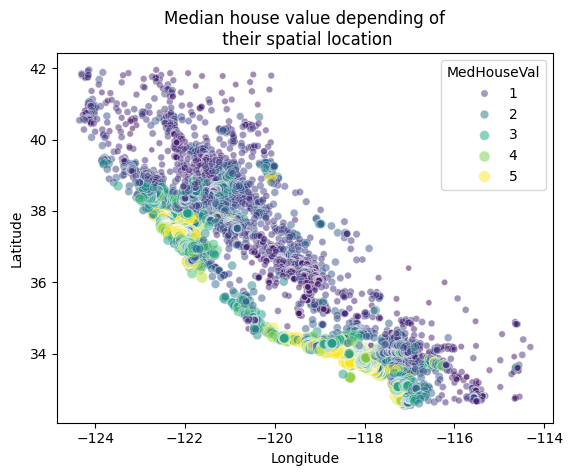

In [ ]:
sns.scatterplot(data=california_housing_df, x="Longitude", y="Latitude", size="MedHouseVal", hue="MedHouseVal", palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal")
_= plt.title("Median house value depending of\n their spatial location")

In [ ]:
rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(california_housing.frame.shape[0]), size=500, replace=False
)

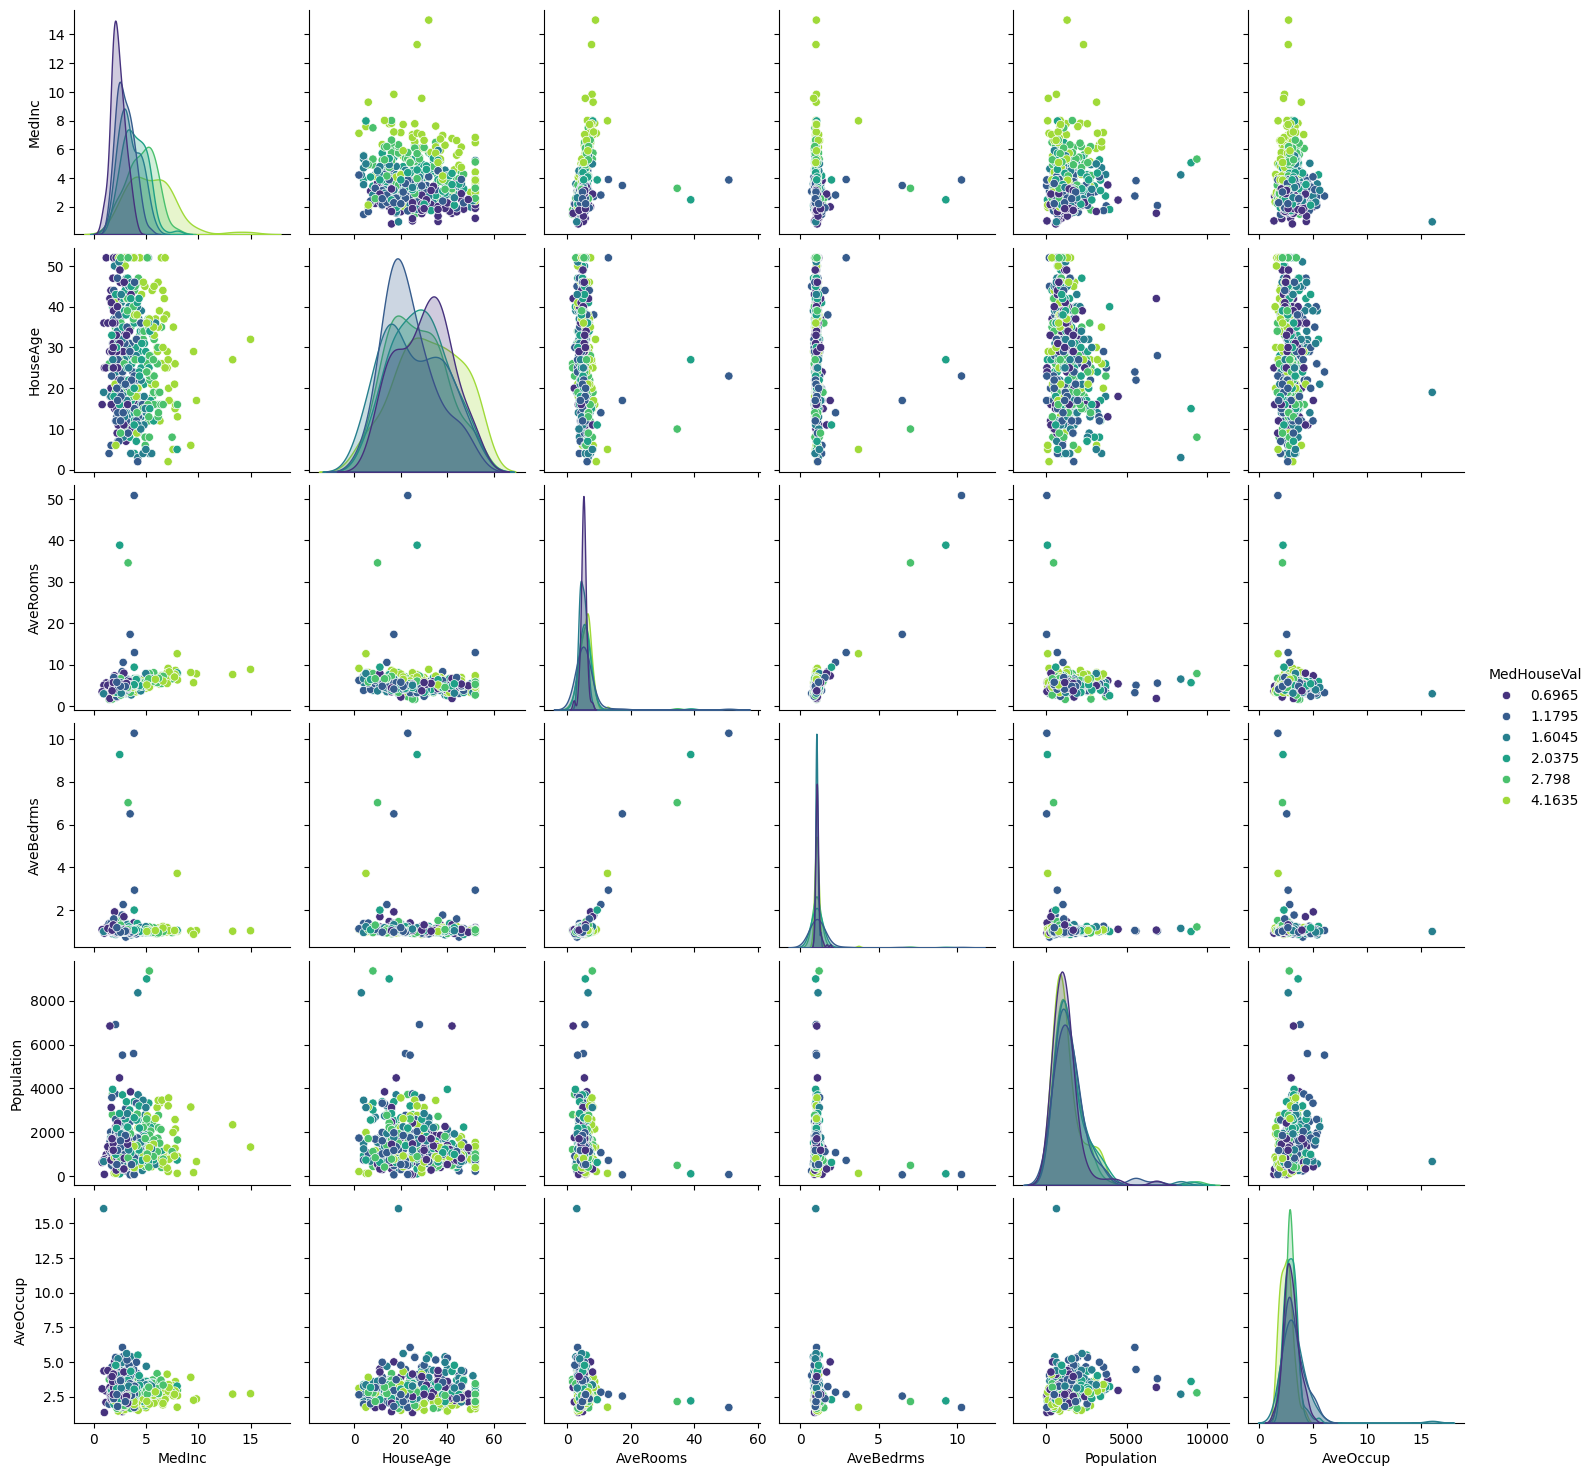

In [ ]:
columns_drop = ["Longitude", "Latitude"]
subset = california_housing_df.iloc[indices].drop(columns=columns_drop)
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

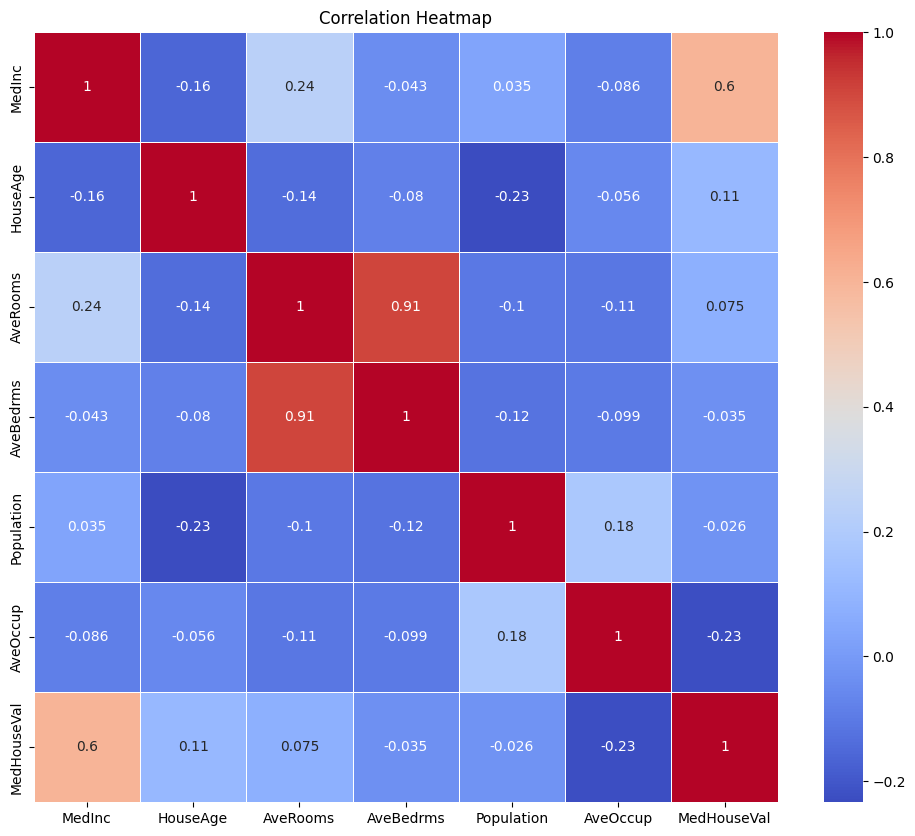

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=subset.corr(), annot=True, linewidths=0.5, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()